1. Write function`linear_regression()` to calculate `c_0` and `c_1` with input parameters are `x` and `y`, where both are `list` with the same length.

No handles with labels found to put in legend.


c_0, c_1
[3.2, 1.0]


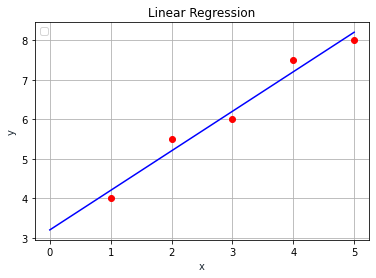

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Define data 
xdata = [1, 2, 3, 4, 5]
ydata = [4, 5.5, 6, 7.5, 8]

N = len(xdata)

# Define function for linear regression
def sum_products(x, y): 
    N = min(len(x), len(y))
    s = 0
    for i in range(N):
        s += x[i]*y[i]
    return s

Sy = sum(ydata)
Sx = sum(xdata)
Sxx = sum_products(xdata, xdata)
Sxy = sum_products(xdata, ydata)
    
c_0 = (Sy*Sxx - Sx*Sxy) / (N*Sxx - Sx*Sx)
c_1 = (N*Sxy - Sx*Sy) / (N*Sxx - Sx*Sx)
c = [c_0, c_1]

print("c_0, c_1")
print(c)


# Plot linear regression
xlin = np.linspace(0,5,100)
ylin = c_0 + c_1*xlin
plt.plot(xdata, ydata, 'ro', xlin, ylin, 'b-')
plt.title('Linear Regression')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

2. Write functions `linear_interpol()` to calculate linear interpolation with input parameters are `x` and `y`, where both are `list` with the same length.

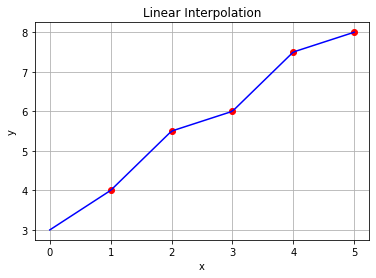

In [26]:
# Linear interpolation

def q(j, x, xdata, ydata):
    q1 = ydata[j+1] * (x - xdata[j]) / (xdata[j+1] - xdata[j])
    q2 = ydata[j] * (x - xdata[j+1]) / (xdata[j] - xdata[j+1])
    qjx = q1 + q2
    return qjx

def p(x, xdata, ydata):
    n = min(len(xdata), len(ydata))
    h = xdata[1] - xdata[0]
    j = math.floor((x - xdata[0]) / h)
    if j >= n - 1: j = n - 2
    px = q(j, x, xdata, ydata)
    return px

def linear_interpolation(x, xdata, ydata):
    y = [p(i, xdata, ydata) for i in x]
    return y

x2 = np.linspace(0, 5, 100).tolist()
y2 = linear_interpolation(x2, xdata, ydata)

# Plot linear interpolation
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata, ydata, 'ro', x2, y2, 'b-')
plt.title('Linear Interpolation')
plt.show()

3. Write functions `lagrange_interpol()` to calculate Lagrange polynomial interpolation with input parameters are `x` and `y`, where both are `list` with the same length.

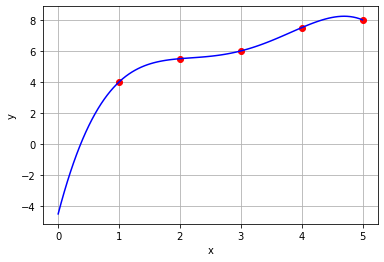

In [18]:
# Lagrange interpolation

def q(j, x, xdata, ydata):
    n = min(len(xdata), len(ydata))
    prod = 1
    for k in range(n):
        if k != j:
            prod *= (x - xdata[k]) / (xdata[j] - xdata[k])
    qjx = ydata[j] * prod
    return qjx

def p(x, xdata, ydata):
    n = min(len(xdata), len(ydata))
    px = 0
    for j in range(n):
        px += q(j, x, xdata, ydata)
    return px

def lagrange_polynomial(x, xdata, ydata):
    y = [p(i, xdata, ydata) for i in x]
    return y

x2lag = np.linspace(0, 5, 100).tolist()
y2lag = lagrange_polynomial(x2lag, xdata, ydata)

# Plot Lagrange interpolation
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata, ydata, 'ro', x2lag, y2lag, 'b-')
plt.title('Lagrange Interpolation')
plt.show()

4. Plot curves using, directly or indirectly, the functions `linear_regression()`, `linear_interpol()`, `lagrange_interpol()`, and the data `x` and `y`. Set right label to each series and show them in the plot legend.

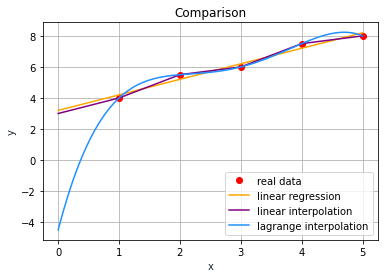

In [33]:
# Plot ALL
xlin = np.linspace(0,5,100)
ylin = c_0 + c_1*xlin
plt.plot(xdata, ydata, 'ro', label='real data')
plt.plot(xlin, ylin, 'orange', label='linear regression') #linreg
plt.plot(x2, y2, 'purple', label='linear interpolation') #linearint
plt.plot(x2lag, y2lag, 'dodgerblue', label='lagrange interpolation') # lagint
plt.title('Comparison')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='lower right')
plt.grid()
plt.show()